In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

# Update the path below to the path where you've stored your dataset in Google Drive
file_path = '/content/drive/My Drive/CV.csv'

# Load the dataset
data = pd.read_csv(file_path)

# Preview the data
print(data.head())

   Unnamed: 0                                            authors  \
0        1266  Laurence Likforman-Sulem, Abderrazak Zahour, B...   
1        3634  Fulufhelo Vincent Nelwamondo and Tshilidzi Mar...   
2        4201                       Erik Berglund, Joaquin Sitte   
3        4216                        Mourad Zerai, Maher Moakher   
4        4451  Pierre-Fran\c{c}ois Marteau (VALORIA), Gilbas ...   

                                               title  \
0  Text Line Segmentation of Historical Documents...   
1     Rough Sets Computations to Impute Missing Data   
2   The Parameter-Less Self-Organizing Map algorithm   
3  Riemannian level-set methods for tensor-valued...   
4  Multiresolution Approximation of Polygonal Cur...   

                                         journal-ref  \
0            Vol. 9, no 2-4, April 2007, pp. 123-138   
1                                                NaN   
2  IEEE Transactions on Neural Networks, 2006 v.1...   
3                             

In [ ]:
import pandas as pd

# Update the path below to the path where you've stored your dataset in Google Drive
file_path = '/content/drive/My Drive/CV.csv'

# Load the dataset
data = pd.read_csv(file_path)

# Display the first row
print(data.iloc[0])


Unnamed: 0                                                     1266
authors           Laurence Likforman-Sulem, Abderrazak Zahour, B...
title             Text Line Segmentation of Historical Documents...
journal-ref                 Vol. 9, no 2-4, April 2007, pp. 123-138
doi                                       10.1007/s10032-006-0023-z
categories                                                    cs.CV
license                                                         NaN
abstract            There is a huge amount of historical documen...
authors_parsed    [['Likforman-Sulem', 'Laurence', ''], ['Zahour...
year                                                           2007
month                                                             5
Name: 0, dtype: object


In [ ]:
# Display statistical summary of the dataset
print(data.describe())


         Unnamed: 0           year          month
count  1.017990e+05  101799.000000  101799.000000
mean   1.350339e+06    2020.229472       6.477706
std    3.803895e+05       2.528588       3.239325
min    1.266000e+03    2007.000000       1.000000
25%    1.095597e+06    2019.000000       4.000000
50%    1.404333e+06    2021.000000       6.000000
75%    1.666318e+06    2022.000000       9.000000
max    2.304647e+06    2023.000000      12.000000


In [ ]:
'''
This code generates synthetic text documents and summaries, cleans and tokenizes them, and splits the data into training and testing
sets for NLP tasks, using libraries like `numpy`, `re`, and `sklearn`.
'''
from sklearn.model_selection import train_test_split
import numpy as np
import re

# Simulate a dataset
np.random.seed(42)  # For reproducibility

# Example document creation by concatenating titles (as a stand-in for full texts)
documents = [' '.join(np.random.choice(data['abstract'], size=np.random.randint(5, 15))) for _ in range(100)]

# Create synthetic summaries (for demonstration)
summaries = [" ".join(doc.split()[:np.random.randint(10, 20)]) + '...' for doc in documents]

# Basic text cleaning and tokenization
def clean_and_tokenize(text):
    # Simple cleaning: lowercasing, removing non-alphanumeric characters
    text = text.lower()
    text = re.sub(r'[^a-z0-9\s]', '', text)
    # Simple tokenization by whitespace
    tokens = text.split()
    return tokens

# Apply cleaning and tokenization
documents_cleaned = [clean_and_tokenize(doc) for doc in documents]
summaries_cleaned = [clean_and_tokenize(summary) for summary in summaries]

# Split the dataset into training and testing sets
train_docs, test_docs, train_summaries, test_summaries = train_test_split(documents_cleaned, summaries_cleaned, test_size=0.2, random_state=42)

# Example output
train_docs[0][:10], train_summaries[0][:10]  # Show the first 10 tokens of the first training document and summary


(['the',
  'diffusion',
  'probabilistic',
  'model',
  'dpm',
  'has',
  'recently',
  'gained',
  'popularity',
  'in'],
 ['the',
  'diffusion',
  'probabilistic',
  'model',
  'dpm',
  'has',
  'recently',
  'gained',
  'popularity',
  'in'])

In [ ]:
# Preview the titles
print(data['abstract'].head())


0      There is a huge amount of historical documen...
1      Many techniques for handling missing data ha...
2      The Parameter-Less Self-Organizing Map (PLSO...
3      We present a novel approach for the derivati...
4      We propose a new algorithm to the problem of...
Name: abstract, dtype: object


In [ ]:
'''

This code constructs directed graphs from text abstract using TF-IDF for key word extraction, Spacy for parsing, and NetworkX for graph creation.
Each graph represents syntactic dependencies between significant nouns, adjectives, and adverbs within a title, illustrating the structure and
relationships of key terms.

'''


# Experiment 1: TF-IDF Based Graph Structure, SpaCy- parsing

from sklearn.feature_extraction.text import TfidfVectorizer
import networkx as nx
import spacy
import numpy as np

# Initialize Spacy's English model
nlp = spacy.load('en_core_web_sm')

# Select a subset of titles for demonstration
abstract = data['abstract'].head(10).tolist()

# Calculate TF-IDF for the titles
vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = vectorizer.fit_transform(abstract)
print(tfidf_matrix)
feature_names = vectorizer.get_feature_names_out()

# For simplicity, treat each abstract as a "document"
for abstract in abstract:
    doc = nlp(abstract)
    G = nx.DiGraph()

    # Simplified logic to add nodes based on the title's content
    for token in doc:
        if token.pos_ in ['NOUN', 'ADJ', 'ADV'] and not token.is_stop:
            G.add_node(token.lemma_, pos=token.pos_)
            for child in token.children:
                if child.pos_ in ['NOUN', 'ADJ', 'ADV'] and not child.is_stop:
                    G.add_node(child.lemma_, pos=child.pos_)
                    G.add_edge(token.lemma_, child.lemma_, relation=child.dep_)

    # Example: Print the graph structure for the first title
    print("Graph for abstract:", abstract)
    print("Nodes:", G.nodes(data=True))
    print("Edges:", G.edges(data=True))
    break  # Remove or modify this based on your needs


  (0, 76)	0.10961303579799109
  (0, 73)	0.10961303579799109
  (0, 87)	0.10961303579799109
  (0, 218)	0.09318109467288804
  (0, 115)	0.10961303579799109
  (0, 374)	0.10961303579799109
  (0, 284)	0.08152244690580512
  (0, 259)	0.058843371700202124
  (0, 128)	0.09318109467288804
  (0, 324)	0.09318109467288804
  (0, 246)	0.10961303579799109
  (0, 186)	0.10961303579799109
  (0, 170)	0.10961303579799109
  (0, 8)	0.10961303579799109
  (0, 26)	0.10961303579799109
  (0, 238)	0.09318109467288804
  (0, 32)	0.10961303579799109
  (0, 57)	0.08152244690580512
  (0, 308)	0.09318109467288804
  (0, 194)	0.10961303579799109
  (0, 188)	0.21922607159598217
  (0, 339)	0.16304489381161025
  (0, 96)	0.10961303579799109
  (0, 366)	0.10961303579799109
  (0, 198)	0.10961303579799109
  :	:
  (9, 341)	0.10560790830853277
  (9, 91)	0.31682372492559835
  (9, 102)	0.10560790830853277
  (9, 301)	0.10560790830853277
  (9, 330)	0.4224316332341311
  (9, 234)	0.21121581661706554
  (9, 314)	0.21121581661706554
  (9, 335)	0

In [ ]:
'''
Offers comprehensive preprocessing using NLTK and SpaCy, checks dataset integrity, and sets up a detailed pipeline for text processing
and analysis without visualization. It's the most complex and thorough, aimed at deep linguistic analysis and preprocessing.
'''

# Necessary Imports
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag
import re
from google.colab import drive
import spacy
from transformers import pipeline
import networkx as nx

# NLTK Data Download
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

# Mount Google Drive
drive.mount('/content/drive', force_remount=True)

# Load Dataset
file_path = '/content/drive/My Drive/CV.csv'
data = pd.read_csv(file_path)


column_name = 'abstract'
if column_name not in data.columns:
    raise ValueError(f"The column '{column_name}' does not exist in the dataset.")

# NLTK Preprocessing Setup
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess(text):
    text = text.lower()
    text = re.sub(r'\W', ' ', text)
    tokens = nltk.word_tokenize(text)
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    pos_tags = pos_tag(tokens)
    return " ".join(tokens), pos_tags

# Load SpaCy NLP model for additional NLP tasks
nlp = spacy.load('en_core_web_sm')

# Initialize NER pipeline with BERT model from Transformers
nlp_transformer = pipeline("ner", model="bert-base-uncased")

# Processing abstracts (or the specified column)
for index, row in data.head(10).iterrows():  # Example: Process the first 10 entries
    abstract = row[column_name]
    preprocessed_text, _ = preprocess(abstract)

    # SpaCy Document Processing (Optional here as BERT might need the full context)
    doc = nlp(preprocessed_text)
    simple_text = " ".join([token.text for token in doc])

    # NER with BERT
    entities = nlp_transformer(simple_text)

    # Graph Representation with NetworkX
    G = nx.DiGraph()
    for entity in entities:
        if entity['entity'] not in G:
            G.add_node(entity['word'], type=entity['entity'])

    # Example output for demonstration
    print(f"Graph for Abstract {index+1}:")
    print("Nodes:", G.nodes(data=True))
    print("\n")

    # Break after the first abstract to keep the output manageable
    break


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


Mounted at /content/drive


Some weights of BertForTokenClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Graph for Abstract 1:
Nodes: [('huge', {'type': 'LABEL_1'}), ('amount', {'type': 'LABEL_1'}), ('historical', {'type': 'LABEL_0'}), ('document', {'type': 'LABEL_0'}), ('library', {'type': 'LABEL_0'}), ('various', {'type': 'LABEL_0'}), ('national', {'type': 'LABEL_0'}), ('archive', {'type': 'LABEL_0'}), ('exploited', {'type': 'LABEL_0'}), ('electronically', {'type': 'LABEL_0'}), ('although', {'type': 'LABEL_1'}), ('automatic', {'type': 'LABEL_0'}), ('reading', {'type': 'LABEL_0'}), ('complete', {'type': 'LABEL_0'}), ('page', {'type': 'LABEL_0'}), ('remains', {'type': 'LABEL_0'}), ('case', {'type': 'LABEL_0'}), ('long', {'type': 'LABEL_1'}), ('term', {'type': 'LABEL_1'}), ('objective', {'type': 'LABEL_0'}), ('task', {'type': 'LABEL_0'}), ('word', {'type': 'LABEL_0'}), ('spotting', {'type': 'LABEL_0'}), ('text', {'type': 'LABEL_0'}), ('image', {'type': 'LABEL_0'}), ('alignment', {'type': 'LABEL_1'}), ('authentication', {'type': 'LABEL_0'}), ('extraction', {'type': 'LABEL_0'}), ('specific',

In [ ]:
'''

Simplifies the process by skipping detailed preprocessing and directly using SpaCy for NER, then constructing a graph of entities.
It focuses on structure rather than visualization, making it straightforward and more focused than the Above code.

'''

from transformers import pipeline
import spacy
import networkx as nx

# Load Spacy NLP model
nlp = spacy.load('en_core_web_sm')

# Initialize NER pipeline with BERT model
nlp_transformer = pipeline("ner", model="bert-base-uncased")

# Assuming 'data' is a DataFrame and 'abstract' is a column with text data
# Process the first 10 abstracts
abstracts = data['abstract'].head(10).tolist()

# Preprocess and analyze each abstract
for abstract in abstracts:
    G = nx.DiGraph()

    # Preprocessing with Spacy
    # Note: For NER using BERT, you might not want to remove stopwords or lemmatize as BERT benefits from the full context
    doc = nlp(abstract)

    # Convert Spacy Doc to simple text, as the Transformers pipeline expects raw text.
    # This step is where you might further preprocess, but here we're keeping it simple.
    simple_text = " ".join([token.text for token in doc])

    # Named Entity Recognition with BERT
    entities = nlp_transformer(simple_text)

    # Add entities as nodes in the graph
    for ent in entities:
        G.add_node(ent['word'], type=ent['entity'])

    # Example: Print the graph structure for the first abstract
    print("Graph for abstract:", abstract)
    print("Nodes:", G.nodes(data=True))

    # Stop after the first abstract for demonstration purposes
    break


Some weights of BertForTokenClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Graph for abstract:   There is a huge amount of historical documents in libraries and in various
National Archives that have not been exploited electronically. Although
automatic reading of complete pages remains, in most cases, a long-term
objective, tasks such as word spotting, text/image alignment, authentication
and extraction of specific fields are in use today. For all these tasks, a
major step is document segmentation into text lines. Because of the low quality
and the complexity of these documents (background noise, artifacts due to
aging, interfering lines),automatic text line segmentation remains an open
research field. The objective of this paper is to present a survey of existing
methods, developed during the last decade, and dedicated to documents of
historical interest.

Nodes: [('there', {'type': 'LABEL_1'}), ('is', {'type': 'LABEL_0'}), ('a', {'type': 'LABEL_0'}), ('huge', {'type': 'LABEL_0'}), ('amount', {'type': 'LABEL_0'}), ('of', {'type': 'LABEL_0'}), ('historical',

In [ ]:
'''
This code performs extractive text summarization on a given text using natural language processing (NLP) techniques. It mounts my Google Drive
to access the dataset, preprocesses the text into sentences, constructs a TF-IDF matrix for vector representation, builds a graph based on
cosine similarity between sentence vectors, and then applies the PageRank algorithm to rank the sentences by importance. Finally,
it selects the top sentences for the summary and prints each sentence neatly on a new line. This approach combines several NLP methods
to automate the summarization process and facilitate the understanding of key content within a larger body of text.

'''
# Step 1: Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import networkx as nx
from nltk.tokenize import sent_tokenize
import nltk

# Ensure NLTK resources are downloaded
nltk.download('punkt')

# Step 2: Load the Dataset
file_path = '/content/drive/My Drive/CV.csv'
data = pd.read_csv(file_path)

# Step 3: Preprocess the Text
def preprocess_text(text):
    sentences = sent_tokenize(text)
    print("Processed Sentences:", sentences)
    return sentences

# Step 4: Create TF-IDF Matrix
def create_tfidf_matrix(sentences):
    vectorizer = TfidfVectorizer()
    tfidf_matrix = vectorizer.fit_transform(sentences)
    print("TF-IDF Matrix Shape:", tfidf_matrix.shape)
    return tfidf_matrix

# Step 5: Build the Similarity Graph
def build_similarity_graph(tfidf_matrix):
    cosine_sim_matrix = cosine_similarity(tfidf_matrix)
    graph = nx.from_numpy_array(cosine_sim_matrix)
    return graph

# Step 6: Apply PageRank to Rank Sentences - Fixed to include sentences as an argument
def rank_sentences(graph, sentences):
    pagerank_scores = nx.pagerank(graph)
    print("PageRank Scores:", pagerank_scores)
    ranked_sentences = sorted(((pagerank_scores[i], s) for i, s in enumerate(sentences)), reverse=True)
    return ranked_sentences

# Step 7: Generate Summary
def generate_summary(text, summary_length=5):
    sentences = preprocess_text(text)
    tfidf_matrix = create_tfidf_matrix(sentences)
    graph = build_similarity_graph(tfidf_matrix)
    ranked_sentences = rank_sentences(graph, sentences)  # Pass sentences here
    summary_sentences = [sentence for _, sentence in ranked_sentences[:summary_length]]
    summary = " ".join(summary_sentences)
    return summary


example_text = data.iloc[0]['abstract']
#example_text = "The paper outlines the integration of graph theory with advanced NLP techniques to represent text as graphs, thereby capturing semantic relationships within. Through experimentation with the Arxiv-Papers dataset, the authors aim to enhance machine-generated summaries and deepen the understanding of semantic networks in summarization. The methodology includes data collection and preprocessing, graph construction, sentence ranking and selection, followed by a comprehensive evaluation. The paper emphasizes the importance of improving text summarization for knowledge discovery and content management, proposing a method that promises to advance the current state of automated reporting and summarization."
summary = generate_summary(example_text, summary_length=5)

summary_sentences = summary.split('. ')

print("Summary:")
for sentence in summary_sentences:
    print(sentence)



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Processed Sentences: ['  There is a huge amount of historical documents in libraries and in various\nNational Archives that have not been exploited electronically.', 'Although\nautomatic reading of complete pages remains, in most cases, a long-term\nobjective, tasks such as word spotting, text/image alignment, authentication\nand extraction of specific fields are in use today.', 'For all these tasks, a\nmajor step is document segmentation into text lines.', 'Because of the low quality\nand the complexity of these documents (background noise, artifacts due to\naging, interfering lines),automatic text line segmentation remains an open\nresearch field.', 'The objective of this paper is to present a survey of existing\nmethods, developed during the last decade, and dedicated to documents of\nhistorical interest.']
TF-IDF Matrix Shape: (5, 83)
PageRank Scores: {0: 0.1929023697678004, 1: 0.19928418975686055, 2: 0.1844951875940709, 3: 0.21587746888982093, 4: 0.20744078399144666}
Summary:
Beca

In [ ]:
# Step 1: Setup and Data Loading

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Import pandas for data manipulation
import pandas as pd

# Define the path to your dataset
file_path = '/content/drive/My Drive/CV.csv'

# Load the dataset into a DataFrame
data = pd.read_csv(file_path)

# Select the first abstract
first_abstract = data['abstract'][0]
print("First Abstract:", first_abstract)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
First Abstract:   There is a huge amount of historical documents in libraries and in various
National Archives that have not been exploited electronically. Although
automatic reading of complete pages remains, in most cases, a long-term
objective, tasks such as word spotting, text/image alignment, authentication
and extraction of specific fields are in use today. For all these tasks, a
major step is document segmentation into text lines. Because of the low quality
and the complexity of these documents (background noise, artifacts due to
aging, interfering lines),automatic text line segmentation remains an open
research field. The objective of this paper is to present a survey of existing
methods, developed during the last decade, and dedicated to documents of
historical interest.



In [ ]:
# Step 2: Data Preprocessing

# Import NLTK for text processing
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Download necessary NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Function to preprocess text data
def preprocess_text(text):
    stop_words = set(stopwords.words('english'))
    lemmatizer = WordNetLemmatizer()

    words = word_tokenize(text.lower())  # Tokenize and convert to lower case
    filtered_words = [lemmatizer.lemmatize(word) for word in words if word.isalnum() and not word in stop_words]
    return ' '.join(filtered_words)

# Tokenize the first abstract into sentences
sentences = sent_tokenize(first_abstract)

# Preprocess each sentence
processed_sentences = [preprocess_text(sentence) for sentence in sentences]
print("Processed Sentences:", processed_sentences)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...


Processed Sentences: ['huge amount historical document library various national archive exploited electronically', 'although automatic reading complete page remains case objective task word spotting alignment authentication extraction specific field use today', 'task major step document segmentation text line', 'low quality complexity document background noise artifact due aging interfering line automatic text line segmentation remains open research field', 'objective paper present survey existing method developed last decade dedicated document historical interest']


[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
# Step 3: Graph Construction

# Import libraries for vectorization and graph construction
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import networkx as nx

# Vectorize the preprocessed sentences
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(processed_sentences)

# Compute cosine similarity matrix
cosine_sim = cosine_similarity(tfidf_matrix)

# Build the graph
G = nx.Graph()
for i in range(len(cosine_sim)):
    for j in range(i + 1, len(cosine_sim)):
        if cosine_sim[i, j] > 0.1:  # Lower threshold since it's within a single document
            G.add_edge(i, j, weight=cosine_sim[i, j])



# Verify the graph by printing some information
print("Number of nodes:", G.number_of_nodes())
print("Number of edges:", G.number_of_edges())


Number of nodes: 3
Number of edges: 2


In [ ]:
# Step 4: Sentence Ranking Using PageRank

import networkx as nx

# Assuming 'G' is your graph and 'sentences' is your list of sentences

# Apply PageRank to the graph
pagerank_scores = nx.pagerank(G, weight='weight')

# Sort sentences based on their PageRank scores
top_sentence_indices = sorted(pagerank_scores, key=pagerank_scores.get, reverse=True)

# Create a single string from the top-ranked sentences
top_sentences = ' '.join([sentences[idx] for idx in top_sentence_indices])

# Print top-ranked sentences in one line
print("Summary:", top_sentences)


Summary: Because of the low quality
and the complexity of these documents (background noise, artifacts due to
aging, interfering lines),automatic text line segmentation remains an open
research field. For all these tasks, a
major step is document segmentation into text lines. Although
automatic reading of complete pages remains, in most cases, a long-term
objective, tasks such as word spotting, text/image alignment, authentication
and extraction of specific fields are in use today.


In [ ]:
# Install the rouge library if it's not already installed
!pip install rouge


In [ ]:
# Step 5: Evaluation with ROUGE

# Import the Rouge library for evaluation
from rouge import Rouge


reference_summary = "There is a huge amount of historical documents in libraries and in various National Archives that have not been exploited electronically. Although automatic reading of complete pages remains, in most cases, a long-term objective, tasks such as word spotting, text/image alignment, authentication and extraction of specific fields are in use today. For all these tasks, a major step is document segmentation into text lines. Because of the low quality and the complexity of these documents (background noise, artifacts due to aging, interfering lines),automatic text line segmentation remains an open research field. The objective of this paper is to present a survey of existing methods, developed during the last decade, and dedicated to documents of historical interest"
generated_summary = ' '.join([sentences[idx] for idx in top_sentence_indices[:3]])
# Initialize the Rouge object
rouge = Rouge()

# Compute the ROUGE scores
scores = rouge.get_scores(generated_summary, reference_summary)  # Pass reference_summary directly as a string

# Print out the ROUGE scores
print("ROUGE Scores:", scores)


ROUGE Scores: [{'rouge-1': {'r': 0.6818181818181818, 'p': 1.0, 'f': 0.8108108059897736}, 'rouge-2': {'r': 0.5877192982456141, 'p': 0.9710144927536232, 'f': 0.732240432460808}, 'rouge-l': {'r': 0.6818181818181818, 'p': 1.0, 'f': 0.8108108059897736}}]


In [ ]:
!pip install bert_score

In [ ]:
from bert_score import score

# Reference summary as provided
reference_summary = "There is a huge amount of historical documents in libraries and in various National Archives that have not been exploited electronically. Although automatic reading of complete pages remains, in most cases, a long-term objective, tasks such as word spotting, text/image alignment, authentication and extraction of specific fields are in use today. For all these tasks, a major step is document segmentation into text lines. Because of the low quality and the complexity of these documents (background noise, artifacts due to aging, interfering lines),automatic text line segmentation remains an open research field. The objective of this paper is to present a survey of existing methods, developed during the last decade, and dedicated to documents of historical interest."

# Generated summary, assuming 'sentences' is a list of sentences and 'top_sentence_indices' are the indices of the top sentences selected
# This line is just an example, adjust it according to your real data or replace it with your actual generated summary
generated_summary = ' '.join([sentences[idx] for idx in top_sentence_indices[:3]])

# Calculate BERTScore
P, R, F1 = score([generated_summary], [reference_summary], lang="en")

# Printing the BERTScore metrics
print("BERTScore (Precision):", P.item())
print("BERTScore (Recall):", R.item())
print("BERTScore (F1 Score):", F1.item())


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


BERTScore (Precision): 0.9206584692001343
BERTScore (Recall): 0.9019118547439575
BERTScore (F1 Score): 0.9111887216567993


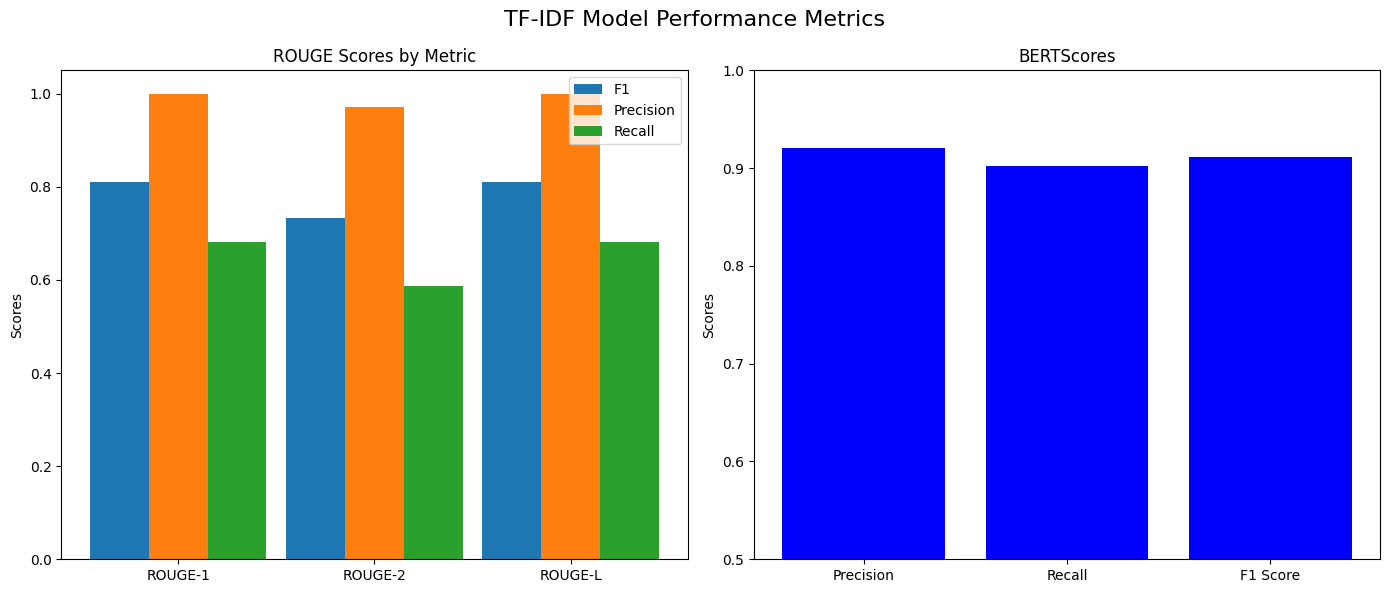

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
# Updated ROUGE Scores Data from the latest information
rouge_scores_latest = {
    'ROUGE-1': {'f': 0.8108108059897736, 'p': 1.0, 'r': 0.6818181818181818},
    'ROUGE-2': {'f': 0.732240432460808, 'p': 0.9710144927536232, 'r': 0.5877192982456141},
    'ROUGE-L': {'f': 0.8108108059897736, 'p': 1.0, 'r': 0.6818181818181818}
}

# Updated BERTScores Data from the latest information
bert_scores_latest = {
    'Precision': 0.9206584692001343,
    'Recall': 0.9019118547439575,
    'F1 Score': 0.9111887216567993
}

# Create figure and axes for updated data
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Figure title
fig.suptitle('TF-IDF Model Performance Metrics', fontsize=16)

# Plot latest ROUGE scores
rouge_categories_latest = ['ROUGE-1', 'ROUGE-2', 'ROUGE-L']
rouge_f_latest = [rouge_scores_latest[cat]['f'] for cat in rouge_categories_latest]
rouge_p_latest = [rouge_scores_latest[cat]['p'] for cat in rouge_categories_latest]
rouge_r_latest = [rouge_scores_latest[cat]['r'] for cat in rouge_categories_latest]
x_latest = np.arange(len(rouge_categories_latest))  # the label locations

# Define bar width
width_latest = 0.3

# Create bars
axs[0].bar(x_latest - width_latest, rouge_f_latest, width_latest, label='F1')
axs[0].bar(x_latest, rouge_p_latest, width_latest, label='Precision')
axs[0].bar(x_latest + width_latest, rouge_r_latest, width_latest, label='Recall')

# Title and labels
axs[0].set_ylabel('Scores')
axs[0].set_title('ROUGE Scores by Metric')
axs[0].set_xticks(x_latest)
axs[0].set_xticklabels(rouge_categories_latest)
axs[0].legend()

# Plot latest BERT scores
bert_categories_latest = ['Precision', 'Recall', 'F1 Score']
bert_values_latest = [bert_scores_latest[cat] for cat in bert_categories_latest]
axs[1].bar(bert_categories_latest, bert_values_latest, color='blue')

# Title and labels
axs[1].set_title('BERTScores')
axs[1].set_ylabel('Scores')
axs[1].set_ylim([0.5, 1.0])

# Show plot
plt.tight_layout()
plt.show()


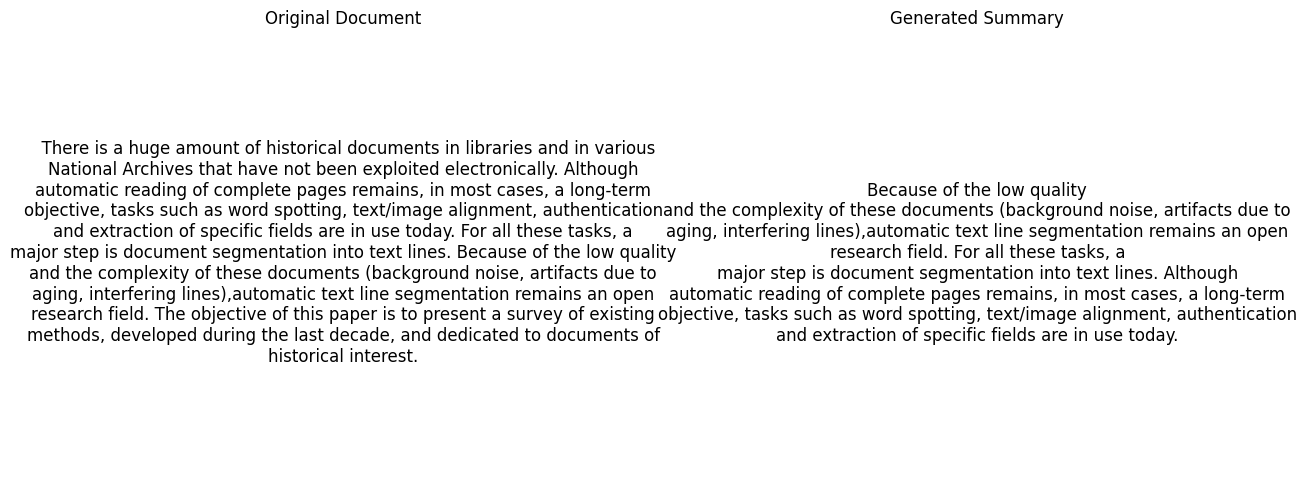

In [ ]:
import matplotlib.pyplot as plt

# Define the original document and generated summary
original_document = first_abstract
generated_summary = top_sentences

# Plotting
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Plot original document
axes[0].text(0.5, 0.5, original_document, horizontalalignment='center', verticalalignment='center', fontsize=12)
axes[0].set_title('Original Document')
axes[0].axis('off')

# Plot generated summary
axes[1].text(0.5, 0.5, generated_summary, horizontalalignment='center', verticalalignment='center', fontsize=12)
axes[1].set_title('Generated Summary')
axes[1].axis('off')

plt.show()


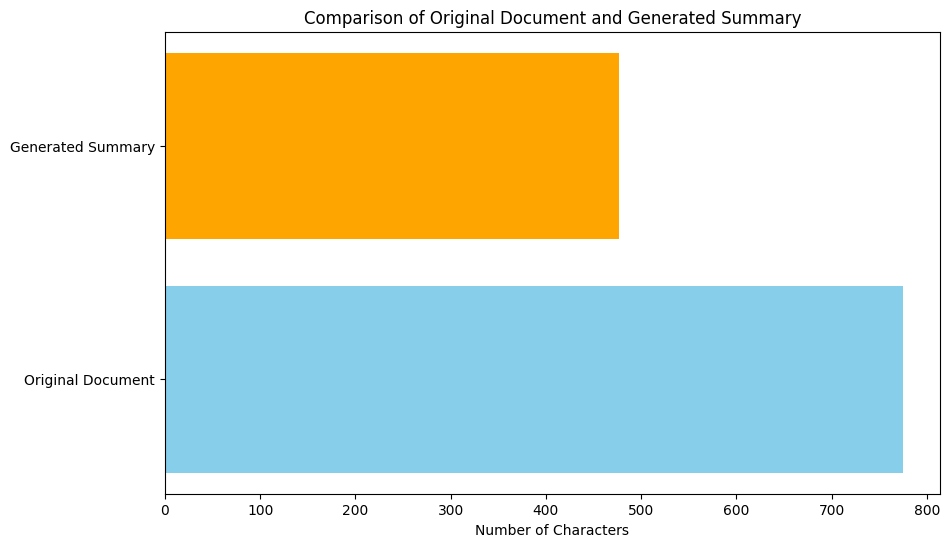

In [ ]:
import matplotlib.pyplot as plt

# Define the original document and generated summary
original_document = first_abstract
generated_summary = top_sentences

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

# Set bar positions
bar_positions = [0, 1]

# Set bar heights
bar_heights = [len(original_document), len(generated_summary)]

# Set bar labels
bar_labels = ['Original Document', 'Generated Summary']

# Create horizontal bar chart
ax.barh(bar_positions, bar_heights, align='center', color=['skyblue', 'orange'])

# Set y-ticks and y-tick labels
ax.set_yticks(bar_positions)
ax.set_yticklabels(bar_labels)

# Set labels and title
ax.set_xlabel('Number of Characters')
ax.set_title('Comparison of Original Document and Generated Summary')

plt.show()


In [ ]:
'''

Sentence Tokenization: The first step is to break down each abstract into individual sentences.
This is done using the sent_tokenize function from the NLTK library, which splits text into sentences.

Vectorization (TF-IDF): Once the sentences are tokenized, the next step is to convert these sentences
into a numerical format that can be processed for similarity calculations. This is achieved using the

Term Frequency-Inverse Document Frequency (TF-IDF) method. TF-IDF is a statistical measure used to
evaluate how important a word is to a document in a collection or corpus.

Cosine Similarity: After vectorizing the sentences, the script calculates the cosine similarity between
all pairs of sentences. Cosine similarity is a metric used to determine how similar the documents are irrespective
of their size. In this case, it's used to establish similarity scores between sentences based on their TF-IDF vectors.

Graph Construction: The sentences are represented as nodes in a graph, and edges between these nodes are established
based on their cosine similarity. An edge is created between two nodes if their cosine similarity exceeds a
certain threshold (0.3 in this script), and the weight of the edge is proportional to the similarity score.

PageRank Algorithm: The script uses the PageRank algorithm, a type of centrality measure, to rank the nodes
(sentences) in the graph based on their connections. PageRank was originally developed by Google to rank
websites in their search engine results. In the context of text summarization, it helps identify which
sentences are most central or important in the graph.

Summary Extraction: Based on the rankings from the PageRank algorithm, the script selects the top-ranked
sentences to form the summary. These sentences are considered the most representative or important according
to the graph's structure and the semantic relationships captured via cosine similarity and TF-IDF.

'''

In [ ]:

from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import networkx as nx
import nltk
from nltk.tokenize import sent_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Ensure that NLTK's 'punkt' tokenizer model is downloaded
nltk.download('punkt')

# Load the dataset
file_path = '/content/drive/My Drive/CV.csv'
data = pd.read_csv(file_path)

# Preprocess the Data: Tokenize the document into sentences from 'abstract' column
data['sentences'] = data['abstract'].apply(sent_tokenize)

# Function to build the graph from sentences
def build_graph(sentences):
    vectorizer = TfidfVectorizer(stop_words='english')
    X = vectorizer.fit_transform(sentences)

    # Compute cosine similarity between sentences
    cosine_sim = cosine_similarity(X)

    # Create a graph and add edges based on cosine similarity
    G = nx.Graph()
    for i in range(len(sentences)):
        for j in range(i + 1, len(sentences)):
            if cosine_sim[i, j] > 0.3:  # threshold to define an edge
                G.add_edge(i, j, weight=cosine_sim[i, j])
    return G

# Apply the graph building function to each row of sentences in the DataFrame
data['graphs'] = data['sentences'].apply(build_graph)

# Function to rank nodes (sentences) and extract the summary
def summarize(graph):
    ranks = nx.pagerank(graph, weight='weight')  # Using PageRank to rank nodes
    sorted_ranks = sorted(ranks.items(), key=lambda item: item[1], reverse=True)

    # Select top-ranked sentences
    top_sentences_indices = [idx for idx, rank in sorted_ranks[:5]]
    return top_sentences_indices

data['summary_indices'] = data['graphs'].apply(summarize)
data['summary'] = data.apply(lambda row: [row['sentences'][idx] for idx in row['summary_indices']], axis=1)

# Optionally, display the summaries
print(data[['abstract', 'summary']])


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


                                                 abstract summary
0         There is a huge amount of historical documen...      []
1         Many techniques for handling missing data ha...      []
2         The Parameter-Less Self-Organizing Map (PLSO...      []
3         We present a novel approach for the derivati...      []
4         We propose a new algorithm to the problem of...      []
...                                                   ...     ...
101794    In this article, we describe a new method of...      []
101795    This paper is on the spatio-temporal signals...      []
101796    The spatial distribution of neuronal cells i...      []
101797    Fetal heart rate (FHR) monitoring, before an...      []
101798    Analogue computers use continuous properties...      []

[101799 rows x 2 columns]


In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import networkx as nx
from transformers import BertTokenizer, BertModel
import torch
from google.colab import drive
drive.mount('/content/drive')
# Load dataset
data = pd.read_csv('/content/drive/My Drive/CV.csv')

# Sample column names
text_column = 'abstract'  # Adjust based on your CSV structure

# BERT Model Setup
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')

# Function to preprocess text
def preprocess(texts):
    processed_texts = [tokenizer(text, padding='max_length', max_length=512, truncation=True, return_tensors="pt") for text in texts]
    return processed_texts

# TF-IDF Vectorization
def tfidf_vectorization(texts):
    vectorizer = TfidfVectorizer(stop_words='english')
    tfidf_matrix = vectorizer.fit_transform(texts)
    return tfidf_matrix

# Function to calculate cosine similarity matrix, which is square
def get_cosine_similarity_matrix(tfidf_matrix):
    return cosine_similarity(tfidf_matrix)

import networkx as nx

# Correct Graph Construction
def construct_graph(matrix):
    # Depending on your version of NetworkX, use the appropriate function
    if hasattr(nx, 'from_scipy_sparse_matrix'):
        graph = nx.from_scipy_sparse_matrix(matrix)
    else:
        graph = nx.from_scipy_sparse_array(matrix)
    return graph


# Sentence Ranking using PageRank
def rank_sentences(graph):
    scores = nx.pagerank(graph)
    ranked_sentences = sorted(((scores[i], s) for i, s in enumerate(sentences)), reverse=True)
    return ranked_sentences

# BERT Embeddings
def bert_embeddings(processed_texts):
    with torch.no_grad():
        embeddings = [model(**text).last_hidden_state.mean(dim=1) for text in processed_texts]
    embeddings = torch.stack(embeddings).squeeze()
    return embeddings

# Calculate Cosine Similarity
def cosine_sim(embeddings):
    cos_sim_matrix = cosine_similarity(embeddings.cpu().numpy())
    return cos_sim_matrix

# Main processing steps
texts = data[text_column].tolist()
tfidf_matrix = tfidf_vectorization(texts)
cosine_sim_matrix = get_cosine_similarity_matrix(tfidf_matrix)
graph_with_tfidf = construct_graph_from_similarity_matrix(cosine_sim_matrix)
ranked_by_tfidf = rank_sentences(graph_with_tfidf)

processed_texts = preprocess(texts)
embeddings = bert_embeddings(processed_texts)
bert_cos_sim_matrix = cosine_sim(embeddings)
graph_with_bert = construct_graph_from_similarity_matrix(bert_cos_sim_matrix)
ranked_by_bert = rank_sentences(graph_with_bert)

# Print ranked sentences (Example output)
print("Top sentences ranked by TF-IDF:", ranked_by_tfidf[:5])
print("Top sentences ranked by BERT:", ranked_by_bert[:5])


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import networkx as nx
from transformers import BertTokenizer, BertModel
import torch

# Load dataset
data = pd.read_csv('/content/drive/My Drive/CV.csv')

# Use only the first 10 abstracts for demonstration
data = data.head(10)

# Sample column names
text_column = 'abstract'  # Adjust based on your CSV structure

# BERT Model Setup
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')

# Function to preprocess text
def preprocess(texts):
    processed_texts = [tokenizer(text, padding='max_length', max_length=512, truncation=True, return_tensors="pt") for text in texts]
    return processed_texts

# TF-IDF Vectorization
def tfidf_vectorization(texts):
    vectorizer = TfidfVectorizer(stop_words='english')
    tfidf_matrix = vectorizer.fit_transform(texts)
    return tfidf_matrix

# Function to calculate cosine similarity matrix, which is square
def get_cosine_similarity_matrix(tfidf_matrix):
    return cosine_similarity(tfidf_matrix)

# Graph Construction
def construct_graph_from_similarity_matrix(similarity_matrix):
    graph = nx.from_numpy_array(similarity_matrix)
    return graph

# Sentence Ranking using PageRank
def rank_sentences(graph, sentences):
    scores = nx.pagerank(graph)
    ranked_sentences = sorted(((scores[i], s) for i, s in enumerate(sentences)), reverse=True)
    return ranked_sentences

# BERT Embeddings
def bert_embeddings(processed_texts):
    with torch.no_grad():
        embeddings = [model(**text).last_hidden_state.mean(dim=1) for text in processed_texts]
    embeddings = torch.stack(embeddings).squeeze()
    return embeddings

# Calculate Cosine Similarity
def cosine_sim(embeddings):
    cos_sim_matrix = cosine_similarity(embeddings.cpu().numpy())
    return cos_sim_matrix

# Main processing steps
texts = data[text_column].tolist()
tfidf_matrix = tfidf_vectorization(texts)
cosine_sim_matrix = get_cosine_similarity_matrix(tfidf_matrix)
graph_with_tfidf = construct_graph_from_similarity_matrix(cosine_sim_matrix)
ranked_by_tfidf = rank_sentences(graph_with_tfidf, texts)

processed_texts = preprocess(texts)
embeddings = bert_embeddings(processed_texts)
bert_cos_sim_matrix = cosine_sim(embeddings)
graph_with_bert = construct_graph_from_similarity_matrix(bert_cos_sim_matrix)
ranked_by_bert = rank_sentences(graph_with_bert, texts)

# Print ranked sentences (Example output)
print("Top sentences ranked by TF-IDF:", ranked_by_tfidf[:5])
print("Top sentences ranked by BERT:", ranked_by_bert[:5])


Top sentences ranked by TF-IDF: (0.10975342232654905, '  This paper presents deformable templates as a tool for segmentation and\nlocalization of biological structures in medical images. Structures are\nrepresented by a prototype template, combined with a parametric warp mapping\nused to deform the original shape. The localization procedure is achieved using\na multi-stage, multi-resolution algorithm de-signed to reduce computational\ncomplexity and time. The algorithm initially identifies regions in the image\nmost likely to contain the desired objects and then examines these regions at\nprogressively increasing resolutions. The final stage of the algorithm involves\nwarping the prototype template to match the localized objects. The algorithm is\npresented along with the results of four example applications using MRI, x-ray\nand ultrasound images.\n')
Top sentences ranked by BERT: [(0.10177594109612584, '  We propose a new algorithm to the problem of polygonal curve approximation\nbas